# Support Vector Machine
### Luis Chunga

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from nltk.corpus import wordnet as wn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import pos_tag
import pandas as pd
import time


In [2]:
start_time = time.time()

# Add the Data using pandas
Corpus = pd.read_csv('input/email_dataset.csv',encoding='latin')
Corpus

,email,category
0,forwarded by frank ermis hou ect on pm matthew...,0
1,i would like to rsvp my wife laura and myself ...,0
2,according to my calculations the term needs to...,0
3,forwarded by frank ermis hou ect on pm dale ne...,0
4,rhino here,0
...,...,...
2943,free sizzling ltc sales materials ltc prospect...,1
2944,rape rape sex click here you must be at least ...,1
2945,gb q want to establish the office in china f s...,1
2946,re wall street micro news report homeland secu...,1


In [3]:
### The dataset has 2 class, which 0 is Email and 1 is spam 
### There are 2033 unique email out of 2087 
### There are 1356 unique spam out of 1360 

Corpus.groupby('category').describe()

email                                                               
         count unique                                                top freq
category                                                                     
0         1588   1544  thanks debra perlingiere enron north america c...   12
1         1360   1355  at your serrvice hello welcome to ph elation a...    2

Text(0.5, 1.0, 'Number of Emails and Spams')

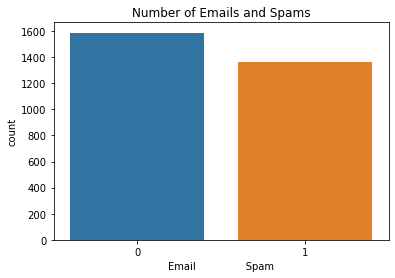

In [4]:
# Display
sns.countplot(Corpus.category)
plt.xlabel('Email                Spam')
plt.title('Number of Emails and Spams')

In [5]:
# Initializing WordNetLemmatizer()
word_Lemmatized = WordNetLemmatizer()

In [6]:

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. 
# By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [7]:
#In this each entry in the corpus will be broken into set of words
Corpus['email']= [word_tokenize(entry) for entry in Corpus['email']]

In [8]:
# IT lematize the corpus and convert the tokenize word to a list of string 
# Removing number

for index,entry in enumerate(Corpus['email']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
   
    # pos_tag function below will provide the 'tag' 
    # if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
        Final_words.append(word_Final)
    
    Corpus.loc[index,'email'] = str(Final_words)


In [9]:
Corpus

,email,category
0,"['forward', 'by', 'frank', 'ermis', 'hou', 'ec...",0
1,"['i', 'would', 'like', 'to', 'rsvp', 'my', 'wi...",0
2,"['accord', 'to', 'my', 'calculation', 'the', '...",0
3,"['forward', 'by', 'frank', 'ermis', 'hou', 'ec...",0
4,"['rhino', 'here']",0
...,...,...
2943,"['free', 'sizzle', 'ltc', 'sale', 'material', ...",1
2944,"['rape', 'rape', 'sex', 'click', 'here', 'you'...",1
2945,"['gb', 'q', 'want', 'to', 'establish', 'the', ...",1
2946,"['re', 'wall', 'street', 'micro', 'news', 'rep...",1


##### Splitting 70% for training and 30% for testing

In [10]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(Corpus['email'],
                                                                    Corpus['category'],
                                                                    test_size=0.2,
                                                                    random_state=20)

In [11]:
# Vectorize the words by using TF-IDF Vectorizer - 
# This is done to find how important a word in document is in comaprison to the corpus
Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(Corpus['email'])

#term frequency–inverse document frequency
X_train_Tfidf = Tfidf_vect.transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

In [12]:
# classifies data 
lr = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto').fit(X_train_Tfidf, Y_train)
yhat = lr.predict(X_test_Tfidf)

# the 3 lines below show how to invoke various output    
print("\n","-> Accuracy",accuracy_score(Y_test, yhat))
print("\n"," -> Classification Report\n",classification_report(Y_test, yhat),sep="")
print("\n","-> Classification Report\n",confusion_matrix(Y_test, yhat),sep="")


 -> Accuracy 0.9830508474576272

 -> Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       333
           1       0.97      0.99      0.98       257

    accuracy                           0.98       590
   macro avg       0.98      0.98      0.98       590
weighted avg       0.98      0.98      0.98       590


-> Classification Report
[[326   7]
 [  3 254]]


In [13]:
print("{:.2f} seconds".format(time.time() - start_time))

53.84 seconds


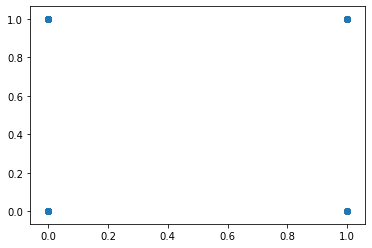

In [14]:


# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Make cross validated predictions
predictions = cross_val_predict(lr, X_train_Tfidf, Y_train, cv=6)
plt.scatter(Y_train, predictions)

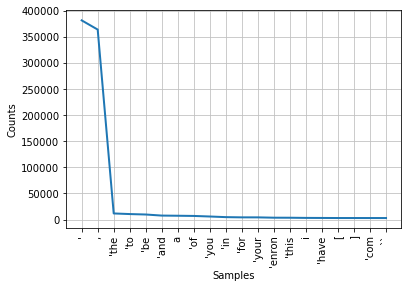

In [15]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
tokenized_word=[]
fdist = FreqDist()
for i in Corpus.email:
  
    for word in word_tokenize(i):
        fdist[word] += 1
        
fdist.plot(20,cumulative=False)
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import numpy as np


ValueError: X.shape[1] = 2 should be equal to 1000, the number of features at training time

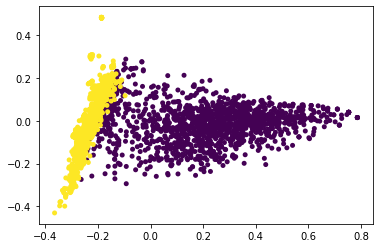

In [17]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(Corpus.email).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=Corpus.category, s=4, linewidths=3 )

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = lr.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(lr.support_vectors_[:, 0], lr.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


#plt.xlabel("Spam")
#plt.ylabel("Email")
plt.show() 